<div align="right"><h8><i>Cristina Cristalli - 838022<br>
Francesca Franzese - 847780<br>
    <b>Progetto Social Media Analytics<br>
        CdL Data Science 2020</b></h8></div>

## Acquisizione dati

In [1]:
import tweepy
import csv
import pandas as pd
import time
import sys
import random

<h3>Raccolta dati tramite Twitter Api, estrapolazione delle informazioni utili all'analisi e salvataggio di esse in un file formato csv</h3>

Autenticazione a Twitter per poter utilizzare la libreria Tweepy

In [2]:
consumer_key = "B9R53BadTipxlcI8CFdAyWXpb"
consumer_secret = "q1fvfcFjbalzgREtt1MCpZrgW6ym4kTTDMMVqn92wkuRQBlfQD"
access_key = "4197159183-HwAwGeV0wTBkt01CxCp2si0MdV2ej§BJHqQWc4OW"
access_secret = "S1tNqtNZre7fZnjNMRmgX6GmzRUFpMVG1YT2P7RfB4kjq"

In [3]:
OAUTH_KEYS = {'consumer_key':consumer_key, 'consumer_secret':consumer_secret,'access_token_key':access_key, 
              'access_token_secret':access_secret}

auth = tweepy.OAuthHandler(OAUTH_KEYS['consumer_key'], OAUTH_KEYS['consumer_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Definizione della funzione "crea_dbTweets" che ritorna un DataFrame a partire da una risposta di Tweepy

In [4]:
def crea_dbTweets(query):
    # Creazione delle varibili per costruire dbTweets
    autore = []
    testo = []
    timestamp = []
    n_retweet=[]
    n_like=[]
    hashtags=[]
    retweet=[]
    autore_retweet=[]
    
    # Ciclo che estrae dalla risposta Twitter i campi utili all'analisi
    for tweet in query:
    
        timestamp.append((tweet.created_at).date())
        autore.append(tweet.user.screen_name)
        testo.append(tweet.text)
        n_retweet.append(tweet.retweet_count)
        n_like.append(tweet.favorite_count)

        try: 
            autore_retweet.append(tweet.retweeted_status.user.screen_name)
            retweet.append("True")        
        except:
            retweet.append("False")
            autore_retweet.append("Nan")

        try:
            hashtags.append(tweet.entities['hashtags'])
        except:
            hashtags.append("Nan")
    
    # Estrazione hashtags
    # Isola le parole che corrispondono agli hashtag e crea una stringa che le contenga tutte
    lista_hashtags=[]
    for elem in range(0, len(hashtags)):
        parole= ""
        for num in range(0,len(hashtags[elem])):
            temp = str(hashtags[elem][num]).split("'")[3]
            parole += str(temp) + " "
        # se il tweet non ha hashtag, assegna alla stringa il valore "Nan"
        if parole == "":
            parole="Nan"
            lista_hashtags.append(parole)
        else:
            lista_hashtags.append(parole)

    
    # Conversione liste in dataframe
    dbTweets = pd.DataFrame()
    dbTweets['data'] = timestamp
    dbTweets['autore'] = autore
    dbTweets['testo'] = testo
    dbTweets['n_retweet'] = n_retweet
    dbTweets['n_like'] = n_like
    dbTweets['hashtags'] = lista_hashtags
    dbTweets['is_retweet'] = retweet
    dbTweets['autore_retweet'] = autore_retweet
    
    return dbTweets

Si sono raccolti i dati per 12 giorni. <br>
La data è stata aggiornata manualmente giorno per giorno, fino al 30/06/20. <br>

In [5]:
data1="2020-06-30"
data2="2020-07-01"

Sono stati raccolti tutti i tweet in italiano relativi ai 17 hashtag che fanno riferimento all'argomento "Pride Day" <br>

In [6]:
db1 = crea_dbTweets(tweepy.Cursor(api.search, q='#omotransfobia',since=data1, until=data2, lang="it").items())
db2 = crea_dbTweets(tweepy.Cursor(api.search, q='#omofobia',since=data1, until=data2,lang="it").items())
db3 = crea_dbTweets(tweepy.Cursor(api.search, q='#transfobia',since=data1, until=data2, lang="it").items())
db4 = crea_dbTweets(tweepy.Cursor(api.search, q='#lgbt',since=data1, until=data2, lang="it").items())

In [7]:
db5 = crea_dbTweets(tweepy.Cursor(api.search, q='#pride',since=data1,until=data2, lang="it").items())
db6 = crea_dbTweets(tweepy.Cursor(api.search, q='#pridemonth',since=data1,until=data2,  lang="it").items())
db7 = crea_dbTweets(tweepy.Cursor(api.search, q='#loveislove',since=data1,until=data2, lang="it").items())
db8 = crea_dbTweets(tweepy.Cursor(api.search, q='#pride2020',since=data1,until=data2, lang="it").items())

In [8]:
db9 = crea_dbTweets(tweepy.Cursor(api.search, q='#zan',since=data1,until=data2, lang="it").items())
db10 = crea_dbTweets(tweepy.Cursor(api.search, q='#leggezan',since=data1,until=data2, lang="it").items())
db11 = crea_dbTweets(tweepy.Cursor(api.search, q='#milanopride',since=data1,until=data2, lang="it").items())
db12 = crea_dbTweets(tweepy.Cursor(api.search, q='#lgbtq',since=data1,until=data2, lang="it").items())

In [9]:
db13 = crea_dbTweets(tweepy.Cursor(api.search, q='#StopOmofobia',since=data1, until=data2,lang="it").items())
db14 = crea_dbTweets(tweepy.Cursor(api.search, q='#pridemonth2020',since=data1, until=data2,  lang="it").items())
db15 = crea_dbTweets(tweepy.Cursor(api.search, q='#omofobo',since=data1, until=data2,  lang="it").items())
db16 = crea_dbTweets(tweepy.Cursor(api.search, q='#gaypride',since=data1,until=data2, lang="it").items())
db17 = crea_dbTweets(tweepy.Cursor(api.search, q='#prideday',since=data1,until=data2, lang="it").items())

In [10]:
# Unione delle risposte dei diversi hashtag
dbTweets = pd.concat([db1, db2, db3, db4, db5, db6, db7, db8, db9, db10, db11, db12, db13, db14, db15, db16, db17], axis=0)

In [12]:
# Salvataggio di dbTweets della giornata in un file .csv
dbTweets.to_csv('dbTweets_30.csv',index = False,encoding='utf-8')

Alla fine dei 12 giorni, i vari csv sono stati uniti per crearne uno unico

In [2]:
dbTweets=pd.DataFrame()

In [3]:
dbTweets18 = pd.read_csv('dbTweets_18.csv')
dbTweets19 = pd.read_csv('dbTweets_19.csv')
dbTweets20 = pd.read_csv('dbTweets_20.csv')
dbTweets21 = pd.read_csv('dbTweets_21.csv')
dbTweets22 = pd.read_csv('dbTweets_22.csv')
dbTweets23 = pd.read_csv('dbTweets_23.csv')
dbTweets24 = pd.read_csv('dbTweets_24.csv')
dbTweets25 = pd.read_csv('dbTweets_25.csv')
dbTweets26 = pd.read_csv('dbTweets_26.csv')
dbTweets27 = pd.read_csv('dbTweets_27.csv')
dbTweets28 = pd.read_csv('dbTweets_28.csv')
dbTweets29 = pd.read_csv('dbTweets_29.csv')
dbTweets30 = pd.read_csv('dbTweets_30.csv')

In [4]:
# Unione dei db dei diversi giorni
dbTweets = pd.concat([dbTweets18, dbTweets19, dbTweets20, dbTweets21, dbTweets22, dbTweets23, dbTweets24, dbTweets25,
                      dbTweets26, dbTweets27, dbTweets28, dbTweets29, dbTweets30], axis=0)

In [ ]:
# Caricamento di dbTweets, se dovesse servire
#dbTweets = pd.read_csv('dbTweets.csv')

In [5]:
dbTweets = dbTweets.reset_index(drop=True)

In [6]:
# Numero totale di tweet ottenuti nell'arco di 12 giorni
len(dbTweets)

34551

In [7]:
dbTweets.head()

,data,autore,testo,n_retweet,n_like,hashtags,is_retweet,autore_retweet
0,2020-06-18,Orobriele,A @Drittorovescio_ @karimamoual ha affermato c...,21.0,39.0,omofobia transfobia,False,Nan
1,2020-06-18,pietro_carli_69,RT @vladiluxuria: La mia solidarietà e affetto...,45.0,0.0,omofobia TRANSFOBIA,True,vladiluxuria
2,2020-06-18,AnnaritaNinni,RT @vladiluxuria: La mia solidarietà e affetto...,45.0,0.0,omofobia TRANSFOBIA,True,vladiluxuria
3,2020-06-18,RilkeRainer,"RT @gayit: J.K Rowling, la casa editrice incer...",8.0,0.0,Nan,True,gayit
4,2020-06-18,alemilord,RT @vladiluxuria: La mia solidarietà e affetto...,45.0,0.0,omofobia TRANSFOBIA,True,vladiluxuria


In [8]:
# Salvataggio csv unico
dbTweets.to_csv('dbTweets.csv',index = False,encoding='utf-8')

In [9]:
ordine=["2020-06-18","2020-06-19","2020-06-20","2020-06-21","2020-06-22","2020-06-23","2020-06-24","2020-06-25",
        "2020-06-26","2020-06-27","2020-06-28","2020-06-29","2020-06-30"]

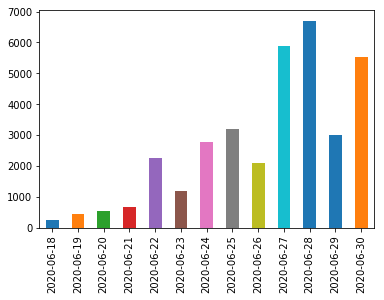

In [11]:
# Plot del numero di tweet giornaliero
dbTweets["data"].value_counts().loc[ordine].plot(kind="bar")

In [12]:
# Conteggio di quanti tweet in dbTweets sono repost
dbTweets.groupby("is_retweet").count()

,data,autore,testo,n_retweet,n_like,hashtags,autore_retweet
is_retweet,,,,,,,
False,8053,8053,8053,8053,8053,8053,8053
True,26498,26498,26498,26498,26498,26498,26498


<h3>Creazione di dbUsers, variabile che conterrà gli archi del social graph</h3>

In [13]:
dbUsers = pd.DataFrame()
nodo_from = []
nodo_to = []

for index, row in dbTweets.iterrows():
    if dbTweets["is_retweet"][index] == True:
        nodo_from.append(dbTweets["autore"][index])
        nodo_to.append(dbTweets["autore_retweet"][index])

dbUsers["nodo_from"] = nodo_from
dbUsers["nodo_to"] = nodo_to

In [14]:
dbUsers.head()

,nodo_from,nodo_to
0,pietro_carli_69,vladiluxuria
1,AnnaritaNinni,vladiluxuria
2,RilkeRainer,gayit
3,alemilord,vladiluxuria
4,SaCe86,vladiluxuria


In [15]:
len(dbUsers)

26498

In [16]:
dbUsers = dbUsers.drop_duplicates()

In [17]:
# Numero di archi, senza duplicati, che andranno a costruire il social graph
len(dbUsers)

17327

In [18]:
# Salvataggio di dbUsers in un file .csv
dbUsers.to_csv('dbUsers.csv',index = False,encoding='utf-8')